In [1]:
# # Requerimientos de librerías:
# !pip install spacy
# !python -m spacy download es_core_news_md

# !pip install transformers
# !pip install transformers scipy ftfy accelerate

# !git clone https://github.com/JorgeSauri/COMSINT.git 

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
import numpy as np
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
from recomendaciones_comsint import Recomendador

c:\Users\jsaur\anaconda3\envs\ENV1\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Con tamaño embeddings 128
- CNN de max 512 kernels (v4)

In [4]:
version = 4

recomendador128 = Recomendador(fuente='recetario_mexicano_small.csv',
                            nutricion = 'nutricion.csv',
                            canasta='canasta_basica.csv')

recomendador128.CargarModelo(emb_size=128, version=version)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
No se encontró el modelo Modelos/Modelo_Nut_FV_DistilBERT_04_EMBED-128_CNN.h5
Puedes crear uno nuevo con el método EntrenarModelo()



In [5]:
recomendador128.generar_dataset_entrenamiento_nut(df_nutricionales='nutricion.csv', 
                                                  min_ingredientes=5, max_ingredientes=20,
                                                  min_gramos=5, max_gramos=100,
                                                  numero_recetas=1)

Generando 1  recetas aleatorias...



100%|██████████| 1/1 [00:00<00:00, 502.13it/s]


array([['71gr de carne de cerdo  cruda  separable delgada y gorda  deshuesada  asado de punta de solomillo de piernas, 29gr de peanuts  raw  valencia, 55gr de comidas rápidas  caramelo  helados, 9gr de comidas rápidas  y jamón  queso  con huevo  croissant, 29gr de maní  con sal  tostado en aceite  valencia, 80gr de bagels  huevo, 60gr de leche  con vitamina d agregada  3.25% de leche con leche  entero, 53gr de bocadillos  sin maní  recubierto de caramelo  palomitas de maíz, 18gr de brócoli  sin preparación  lanzas  congelado',
        '1040.28', '118.16', '48.01', '45.17']], dtype='<U521')


ITERACIÓN: 1
min gramos: 5  max gramos: 100
Entrenando desde epoch 48
------------------------------------------

Error al cargar archivos NumPy.
datasets/numpy/300_recetas_random_EMBED-128_DATA_X.npy no existe o está corrupto.
datasets/numpy/300_recetas_random_EMBED-128_DATA_Y.npy no existe o está corrupto.
Generando 300  recetas aleatorias...



100%|██████████| 300/300 [00:01<00:00, 223.64it/s]


Calculando vector de características de 300 recetas...


100%|██████████| 300/300 [13:45<00:00,  2.75s/it]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_13 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

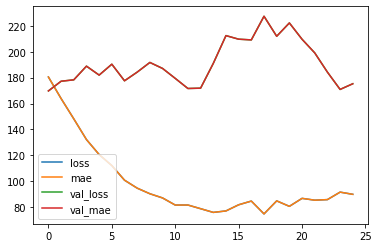

1/1 [==============================] - 0s 262ms/step - loss: 133.4582 - mae: 133.4582
[133.45816040039062, 133.45816040039062]
1/1 [==============================] - 0s 159ms/step
receta 0 kcal_true: 324.0 kcal_pred: 584.32117  precisión: 55.4 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 50.60087  precisión: 66.6 %
receta 0 protein_true: 8.0 protein_pred: 27.069777  precisión: 29.6 %
receta 0 total_fat_true: 0.0 total_fat_pred: 27.849733  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 596.4143  precisión: 73.1 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 57.664005  precisión: 60.1 %
receta 1 protein_true: 8.0 protein_pred: 30.157257  precisión: 26.5 %
receta 1 total_fat_true: 4.0 total_fat_pred: 24.716307  precisión: 16.2 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 1073.1667  precisión: 78.8 %
receta 2 carbohydrate_t

In [11]:
recomendador128.NUM_RECETAS = 5000
recomendador128.EMB_SIZE = 128
ITER = 1
INITIAL_EPOCH = 0
EPOCHS = 25

Histories = []
for iteracion in range(ITER):
  MINGRAMOS = 5 
  MAXGRAMOS = 100   
  print('\nITERACIÓN:', iteracion+1)
  print('min gramos:',MINGRAMOS, ' max gramos:', MAXGRAMOS)
  print('Entrenando desde epoch', INITIAL_EPOCH)
  print('------------------------------------------\n')
  modelo128, history = recomendador128.EntrenarModelo(df_nutricionales='nutricion.csv',
                                #df_training='recipes_con_info_nutricional.csv',
                                df_test='recetas_test.csv', 
                                df_val='recetas_val.csv',
                                learning_rate=1e-4,
                                version=version, 
                                initial_epoch = INITIAL_EPOCH,                             
                                epochs=INITIAL_EPOCH + EPOCHS, 
                                kernels=128,                                             
                                min_ingredientes=5, max_ingredientes=20,
                                min_gramos=MINGRAMOS, max_gramos=MAXGRAMOS,                               
                                save=True, verbose=True)
  INITIAL_EPOCH = history.epoch[-1]

  Histories.append(history)


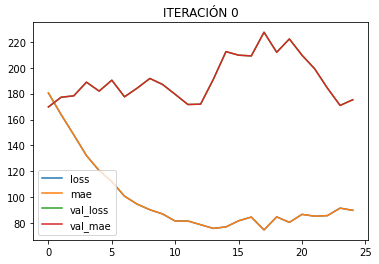

LOSS: 89.82654571533203  -- MAE: 89.82654571533203  -- VAL_LOSS: 175.2900390625  -- VAL_MAE: 175.2900390625
----------------------------------------------------------


In [12]:
for i in range(len(Histories)):
    history = Histories[i]    
    pd.DataFrame(history.history).plot()
    plt.title('ITERACIÓN ' + str(i))
    plt.show()
    print('LOSS:',history.history['loss'][-1], ' -- MAE:', history.history['mae'][-1], 
          ' -- VAL_LOSS:', history.history['val_loss'][-1], ' -- VAL_MAE:', history.history['val_mae'][-1])
    print('----------------------------------------------------------')